In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


c:\repos\Financial-Sentiment-Analysis-with-NLP\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

c:\repos\Financial-Sentiment-Analysis-with-NLP\myenv\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Soura\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [25]:
#Encode
tokens = tokenizer.encode('i hate you', return_tensors='pt')
result = model(tokens)

In [26]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.6703,  0.2675, -0.8444, -1.0805, -0.0164]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [73]:
#Sentiment
result.logits
int(torch.argmax(result.logits))

0

In [28]:
import numpy as np
import pandas as pd



In [30]:
cnbc_df =  pd.read_csv("dataset/cnbc_headlines.csv")
guardian_df =  pd.read_csv("dataset/guardian_headlines.csv")
reuters_df =  pd.read_csv("dataset/reuters_headlines.csv")

In [31]:
cnbc_df.columns


Index(['Headlines', 'Time', 'Description'], dtype='object')

In [32]:
cnbc_df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [33]:
# we are not using Description column because guardian doesn't have one
cnbc_df = cnbc_df.drop(['Description'] , axis = 1)

In [34]:
cnbc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Headlines  2800 non-null   object
 1   Time       2800 non-null   object
dtypes: object(2)
memory usage: 48.2+ KB


In [35]:
cnbc_df.isna().sum()

Headlines    280
Time         280
dtype: int64

In [36]:
cnbc_df.dropna(inplace=True)

In [74]:
guardian_df.head()

,Time,Headlines,Sentiment
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,Positive
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,Very Negative
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,Very Positive
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,Very Negative
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,Very Positive


In [38]:
guardian_df.iloc[0]

Time                                                18-Jul-20
Headlines    Johnson is asking Santa for a Christmas recovery
Name: 0, dtype: object

In [39]:
guardian_df.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [40]:
reuters_df.head

<bound method NDFrame.head of                                                Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  
0      TikTok has been in discussi

In [41]:
reuters_df.iloc[0]

Headlines      TikTok considers London and other locations fo...
Time                                                 Jul 18 2020
Description    TikTok has been in discussions with the UK gov...
Name: 0, dtype: object

In [42]:
reuters_df.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [43]:
reuters_df = reuters_df.drop(['Description'] , axis = 1)

In [44]:
# Function that takes in news and outputs sentiment
def sentiment_score(news):
    tokens = tokenizer.encode(news, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [45]:
# Send each news outlet's headlines through the BERT Model and store the Sentiment output. This may take a while ... 
cnbc_df['Sentiment'] = cnbc_df['Headlines'].apply(lambda x: sentiment_score(x[:]))
guardian_df['Sentiment'] = guardian_df['Headlines'].apply(lambda x: sentiment_score(x[:]))
reuters_df['Sentiment'] = reuters_df['Headlines'].apply(lambda x: sentiment_score(x[:]))

In [64]:
cnbc_df['Sentiment'] = cnbc_df['Sentiment'].replace({1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'})
guardian_df['Sentiment'] = guardian_df['Sentiment'].replace({1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'})
reuters_df['Sentiment'] = reuters_df['Sentiment'].replace({1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'})

In [65]:
cnbc_df

,Headlines,Time,Sentiment
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",Very Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",Positive
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",Very Positive
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",Very Positive
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",Positive
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017",Very Negative
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Very Negative
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Very Negative
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017",Positive


In [66]:
guardian_df

,Time,Headlines,Sentiment
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,Positive
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,Very Negative
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,Very Positive
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,Very Negative
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,Very Positive
...,...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...,Very Positive
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade,Very Negative
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...,Positive
17798,17-Dec-17,Unilever sells household name spreads to KKR f...,Very Negative


In [67]:
reuters_df

,Headlines,Time,Sentiment
0,TikTok considers London and other locations fo...,Jul 18 2020,Neutral
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Very Negative
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Very Negative
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Very Negative
4,U.S. Republicans seek liability protections as...,Jul 17 2020,Very Negative
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,Very Negative
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,Very Negative
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,Very Positive
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Very Positive


In [68]:
import matplotlib.pyplot as plt

In [70]:
def plot_pie_sentiment(df, name):
    sentiment_counts = df['Sentiment'].value_counts()
    
    # Define color map
    color_map = {
        'Very Negative': 'darkred',
        'Negative': 'red',
        'Neutral': 'gray',
        'Positive': 'lightblue',
        'Very Positive': 'blue'
    }
    
    # Get colors for the pie chart
    colors = [color_map[sentiment] for sentiment in sentiment_counts.index]
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Add a legend
    plt.legend(title='Sentiments', labels=sentiment_counts.index, loc='upper left')
    
    plt.title('Distribution of Sentiments in ' + name + ' Dataset')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

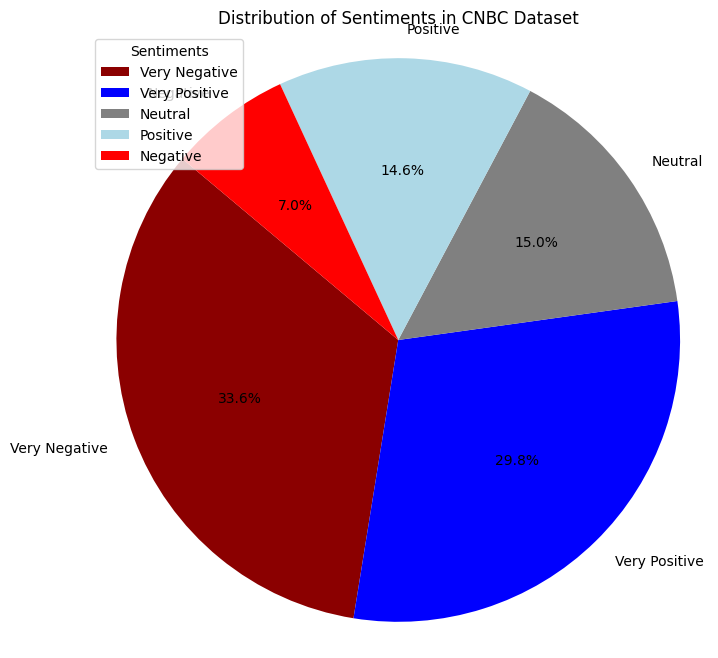

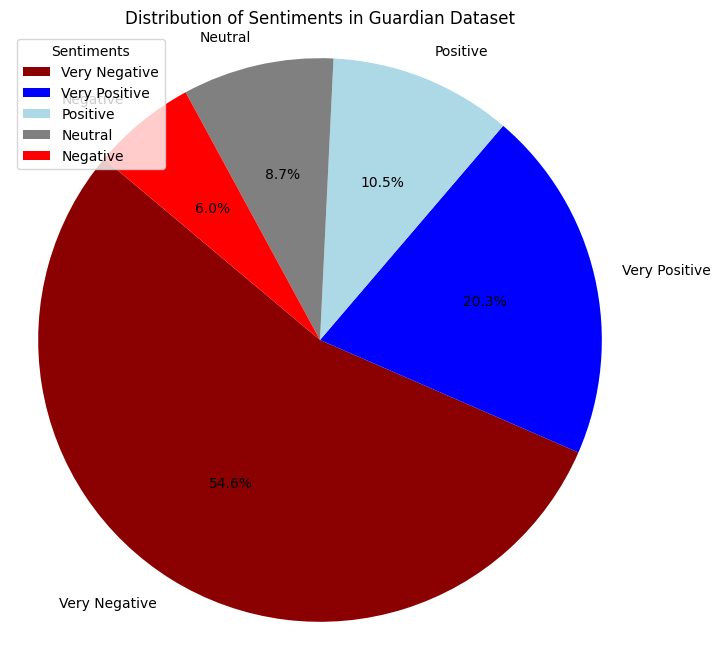

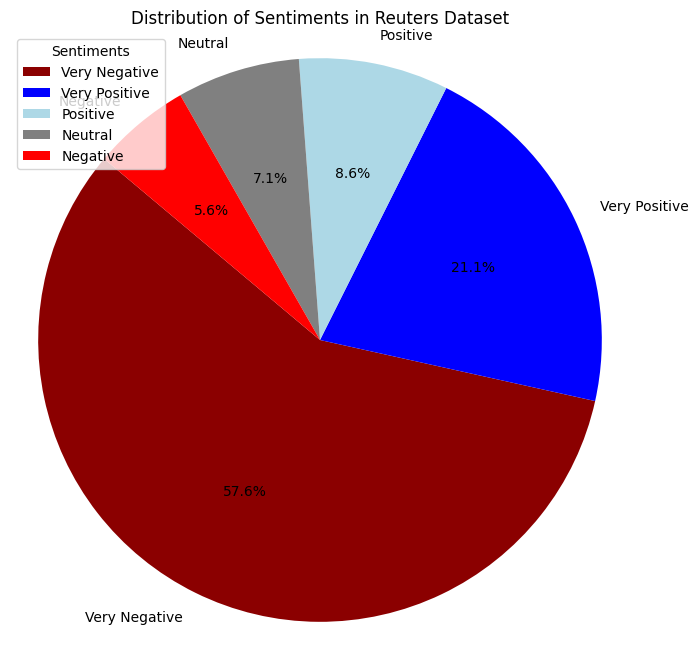

In [71]:
plot_pie_sentiment(cnbc_df, 'CNBC')
plot_pie_sentiment(guardian_df, 'Guardian')
plot_pie_sentiment(reuters_df, 'Reuters')

In [52]:
cnbc_df.to_csv('cnbc_sentiment.csv')
guardian_df.to_csv('guardian_sentiment.csv')
reuters_df.to_csv('reuters_sentiment.csv')